<a href="https://colab.research.google.com/github/piliroberta/Multiscala_progetto/blob/main/cady_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/piliroberta/Multiscala_progetto
!mv Multiscala_progetto/mini_water/* .

In [1]:
#@title Increase the output length 
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10000000})

In [2]:
#@title Installing GROMACS and related packages
!apt install gromacs &> /dev/null
!apt install dssp &> /dev/null
!ln -s /usr/bin/dssp /usr/local/bin/dssp
!apt install ghostscript &> /dev/null

In [ ]:
#@title Installing NGLview
!pip install nglview  &> /dev/null
!pip install simpletraj  &> /dev/null
!pip install mdanalysis &> /dev/null
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
!mkdir cady_mini

In [ ]:
!rm position

rm: cannot remove 'position': Is a directory


In [ ]:
!gmx pdb2gmx -f cady_3.pdb -i posre.itp -p cadyw.top -o cadyw.gro -ff amber99sb-ildn  -ignh -heavyh -water tip3p

             :-) GROMACS - gmx pdb2gmx, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!gmx editconf -f cadyw.gro -o box.gro -c -d 0.8 -bt dodecahedron 

             :-) GROMACS - gmx editconf, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leade

In [ ]:
!gmx solvate -cp box.gro -o solvated.gro -p cadyw.top 

             :-) GROMACS - gmx solvate, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!tail -n 20 cady/solvated.gro

 2006SOL    HW2 6348   4.421   4.242   3.051
 2007SOL     OW 6349   4.197   4.224   2.053
 2007SOL    HW1 6350   4.258   4.304   2.057
 2007SOL    HW2 6351   4.102   4.255   2.060
 2008SOL     OW 6352   3.987   4.050   2.582
 2008SOL    HW1 6353   3.908   4.101   2.548
 2008SOL    HW2 6354   3.978   4.035   2.680
 2009SOL     OW 6355   4.396   3.927   3.351
 2009SOL    HW1 6356   4.486   3.911   3.311
 2009SOL    HW2 6357   4.404   3.932   3.450
 2010SOL     OW 6358   3.796   3.890   2.180
 2010SOL    HW1 6359   3.779   3.973   2.126
 2010SOL    HW2 6360   3.886   3.853   2.158
 2011SOL     OW 6361   4.152   4.148   2.382
 2011SOL    HW1 6362   4.182   4.076   2.320
 2011SOL    HW2 6363   4.113   4.108   2.465
 2012SOL     OW 6364   4.041   4.271   3.142
 2012SOL    HW1 6365   4.079   4.212   3.214
 2012SOL    HW2 6366   4.081   4.245   3.054
   4.52316   4.52316   3.19836   0.00000   0.00000   0.00000   0.00000   2.26158   2.26158


In [ ]:
!tail cady/cadyw.top -n 5


[ molecules ]
; Compound        #mols
Protein             1
SOL              1992


In [ ]:
!touch dummy.mdp

In [ ]:
!gmx grompp -f dummy.mdp -c solvated.gro -p cadyw.top -o ions.tpr

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!echo "SOL" | gmx genion -s ions.tpr -p cadyw.top -o box_ions.gro -conc 0.15 -neutral

              :-) GROMACS - gmx genion, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!gmx grompp -f template.mdp -p cadyw.top -c box_ions.gro -o cadyw.tpr -maxwarn 2

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
! gmx mdrun -s cadyw.tpr -deffnm cadywmin -v -ntmpi 2

              :-) GROMACS - gmx mdrun, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

In [ ]:
! echo -e "Potential \n 0" | gmx energy -f cadywmin.edr -o potential.xvg

              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

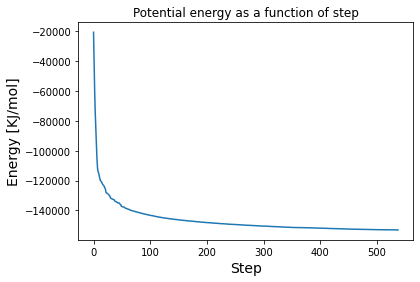

In [ ]:
import matplotlib.pyplot as plt # Import from the library matplotlib  the package pyplot and alias it as plt 
import numpy as np #import the library numpy and alias it as np
'''load the data from the potential.xvg format into data, ...
define the comments as raw starting with either # or @'''
data=np.loadtxt("potential.xvg",comments=["#","@"])
step=data[:,0] #assign the first column of data to the variable step
energy=data[:,1] #assign the second column of data to the variable potential
plt.plot(step,energy) #plot the function potential(data)
plt.xlabel("Step",size=14) #assign the x label 
plt.ylabel("Energy [KJ/mol]",size=14) #assign the y label
plt.title("Potential energy as a function of step"); #assign a title 
#save the figure in png format with a resolution of 300 dot per inch "dpi" 
plt.savefig("potential_steep_w.png",format="png", dpi=300)

In [ ]:
ls

 box.gro        cadywmin.log     dummy.mdp     potential_steep_w.png
 box_ions.gro   cadywmin.trr     ions.tpr      potential.xvg
 cady_3.pdb     cadyw.top        mdout.mdp     sample_data/
 cadyw.gro     '#cadyw.top.1#'   position2/    solvated.gro
 cadywmin.edr  '#cadyw.top.2#'   posre.itp     template.mdp
 cadywmin.gro   cadyw.tpr       'posre.mdp '


In [ ]:
!gmx grompp -f template.mdp -p cadyw.top -c cadywmin.gro -r cadywmin.gro  -o posre2.tpr -maxwarn 2

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!gmx mdrun -s posre2.tpr -deffnm posre2 -v -nt 12 

              :-) GROMACS - gmx mdrun, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

In [ ]:
! echo -e "Temperature" | gmx energy -f posre2.edr -o Temp2.xvg 

              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!gmx grompp -f template.mdp -p cadyw.top -c posre1.gro  -o cady_D1.tpr -maxwarn 2

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!gmx mdrun -deffnm cady_D1 -s cady_D1.tpr -v -nt 12

              :-) GROMACS - gmx mdrun, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

In [ ]:
 !echo -e "Temperature" | gmx energy -f cady_D1.edr -o Temp_D1.xvg 

              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

(1750.0, 2000.0)

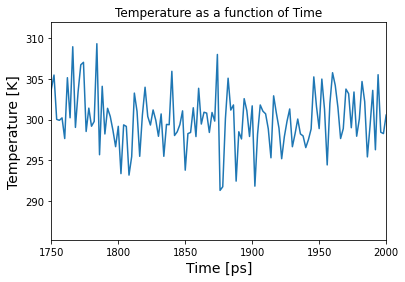

In [ ]:
import matplotlib.pyplot as plt # Import from the library matplotlib  the package pyplot and alias it as plt 
import numpy as np #import the library numpy and alias it as np
'''load the data from the potential.xvg format into data, ...
define the comments as raw starting with either # or @'''
data=np.loadtxt("Temp_D1.xvg",comments=["#","@"])
step=data[:,0] #assign the first column of data to the variable step
energy=data[:,1] #assign the second column of data to the variable potential
plt.plot(step,energy) #plot the function potential(data)
plt.xlabel("Time [ps]",size=14) #assign the x label 
plt.ylabel("Temperature [K]",size=14) #assign the y label
plt.title("Temperature as a function of Time"); #assign a title 
plt.xlim(1750,2000)

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
     


In [ ]:
comm=["#","@"]
temperature=np.loadtxt(f"Temp_D1.xvg",usecols=(1),comments=comm) 
v=temperature[875:1001]
print(v)
print(np.mean(v))
print(np.std(v))
     


[303.758606 305.490143 300.03125  299.913269 300.211884 297.669373
 305.165283 300.22525  308.979218 299.040009 303.442413 306.753235
 307.059204 298.540619 301.414032 299.184418 299.773743 309.351257
 295.673615 304.104248 298.232788 301.393005 300.39447  298.681854
 296.664825 299.171844 293.345856 299.351257 299.163147 293.161926
 295.435303 303.268097 301.016724 295.477722 300.566956 303.990601
 300.391907 299.332947 301.192627 299.925415 297.94577  300.69873
 295.479156 299.406647 299.375458 305.952209 298.04306  298.499084
 299.386169 301.078613 293.771759 298.276062 298.420044 301.460358
 297.910919 303.859436 299.453735 300.910339 300.802155 298.419525
 300.880188 299.818756 308.028351 291.281952 291.726929 300.124054
 305.101166 301.17569  301.808167 292.42157  298.504456 297.617523
 302.582062 301.094696 297.921661 301.695007 291.801727 298.208069
 301.804047 301.036407 300.714996 298.86618  295.295929 302.930786
 300.838226 298.946106 295.181244 297.897766 299.802399 301.311

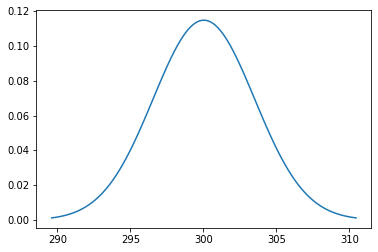

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
media = 300.03042092063487
deviazione_standard = 3.4734691789224375
x = np.linspace(media - 3*deviazione_standard, media + 3*deviazione_standard, 100)
plt.plot(x, stats.norm.pdf(x, media, deviazione_standard))
plt.show()
     


In [19]:
!echo -e "Backbone\nBackbone" | gmx rms -s cady_3.pdb -f cady_D2.xtc -o rmsd2.xvg 
!echo -e "System" | gmx trjconv -s cady_D2.tpr -f cady_D2.xtc -dump 2000 -o struct2ns_2.pdb 


               :-) GROMACS - gmx rms, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:

In [20]:
!echo -e "Backbone\nBackbone" | gmx rms -s struct2ns_2.pdb -f cady_D2.xtc -o rmsd2_2ns.xvg -tu ns

               :-) GROMACS - gmx rms, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:

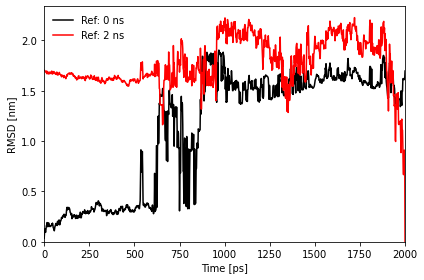

In [21]:
time, rmsd = np.loadtxt('rmsd2.xvg',comments=['@','#'],unpack=True)
_, rmsd9 = np.loadtxt('rmsd2_2ns.xvg',comments=['@','#'],unpack=True)

# Prepare the figure
fig = plt.figure()
ax = fig.add_subplot(111,)

# Plot your data
ax.plot(time,rmsd,label='Ref: 0 ns',c='k')
ax.plot(time,rmsd9,label='Ref: 2 ns',c='r')

# Adjust the plot and personalize
ax.set_xlim(time[0],time[-1])
m = np.max(np.concatenate((rmsd,rmsd9)))*1.05
ax.set_ylim(0,m)
ax.set_xlabel(r"Time [ps]")
ax.set_ylabel(r"RMSD [nm]")
ax.legend(frameon=False)

# This allows you to adjust the figure limits to make your figure nice
# (Recommended but not compulsory)
fig.tight_layout()



In [22]:
%%bash
echo "C-alpha" | gmx rmsf -f cady_D2.xtc -s cady_D2.tpr -o rmsf2.xvg -res

Selected 3: 'C-alpha'


               :-) GROMACS - gmx rmsf, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

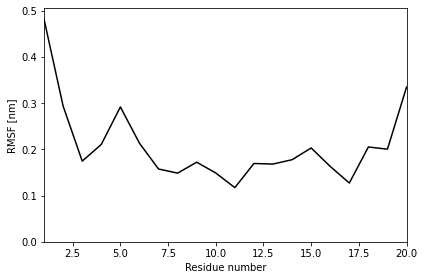

In [23]:
# Load your data
res, rmsf = np.loadtxt('rmsf2.xvg',comments=['@','#'],unpack=True)

# Prepare the figure
fig = plt.figure()
ax = fig.add_subplot(111,)

# Plot your data
ax.plot(res,rmsf,c='k')

# Adjust the plot and personalize
ax.set_xlim(res[0],res[-1])
m = np.max(rmsf)*1.05
ax.set_ylim(0,m)
ax.set_xlabel(r"Residue number")
ax.set_ylabel(r"RMSF [nm]")

# This allows you to adjust the figure limits to make your figure nice
# (Recommended but not compulsory)
fig.tight_layout()

In [24]:
%%bash
echo "r 1
r 20
q" | gmx make_ndx -f cady_3.pdb -o index2.ndx
gmx distance -f cady_D2.xtc -s cady_D2.tpr -select 'com of group "r_1" plus com of group "r_20"' \
-n index2.ndx -oav distance2.xvg

Going to read 0 old index file(s)
Analysing residue names:
There are:    20    Protein residues
Analysing Protein...

  0 System              :   390 atoms
  1 Protein             :   390 atoms
  2 Protein-H           :   188 atoms
  3 C-alpha             :    20 atoms
  4 Backbone            :    60 atoms
  5 MainChain           :    81 atoms
  6 MainChain+Cb        :   100 atoms
  7 MainChain+H         :   103 atoms
  8 SideChain           :   287 atoms
  9 SideChain-H         :   107 atoms

 nr : group      '!': not  'name' nr name   'splitch' nr    Enter: list groups
 'a': atom       '&': and  'del' nr         'splitres' nr   'l': list residues
 't': atom type  '|': or   'keep' nr        'splitat' nr    'h': help
 'r': residue              'res' nr         'chain' char
 "name": group             'case': case sensitive           'q': save and quit
 'ri': residue index

> 

 10 r_1                 :     9 atoms

> 

 11 r_20                :    11 atoms

> 
com of group "r_1" plus co

             :-) GROMACS - gmx make_ndx, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leade

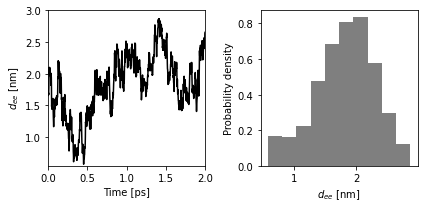

In [25]:
time, d = np.loadtxt('distance2.xvg',comments=['@','#'],unpack=True)
time = time/1000 # gmx distance gives output only in ps
fig = plt.figure(figsize=(6,3))
# in time
ax1 = fig.add_subplot(121,)
ax1.plot(time,d,c='k')
ax1.set_xlim(time[0],time[-1])
M = np.max(d)*1.05
m = np.min(d)*0.95
ax1.set_ylim(m,M)
ax1.set_xlabel(r"Time [ps]")
ax1.set_ylabel(r"$d_{ee}$ [nm]")

# histogram
ax2 = fig.add_subplot(122,)
ax2.hist(d,color='k',density=True,alpha=0.5)
ax2.set_ylabel(r"Probability density")
ax2.set_xlabel(r"$d_{ee}$ [nm]")
fig.tight_layout()


In [26]:
%%bash
echo -e "Protein \n Water \n " | gmx hbond -f cady_D2.xtc -s cady_D2.tpr -num hb_water_protein2.xvg 
echo -e "Protein \n Protein \n " | gmx hbond -f cady_D2.xtc -s cady_D2.tpr -num hb_protein_protein2.xvg 

Specify 2 groups to analyze:
Selected 1: 'Protein'
Selected 12: 'Water'
Checking for overlap in atoms between Protein and Water
Calculating hydrogen bonds between Protein (390 atoms) and Water (7893 atoms)
Found 2671 donors and 2692 acceptors

Will do grid-search on 11x11x8 grid, rcut=0.34999999
Frame loop parallelized with OpenMP using 2 threads.
Average number of hbonds per timeframe 70.591 out of 3.59517e+06 possible
Specify 2 groups to analyze:
Selected 1: 'Protein'
Selected 1: 'Protein'
Found 40 donors and 61 acceptors

Will do grid-search on 11x11x8 grid, rcut=0.34999999
Frame loop parallelized with OpenMP using 2 threads.
Average number of hbonds per timeframe 1.530 out of 1220 possible


              :-) GROMACS - gmx hbond, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

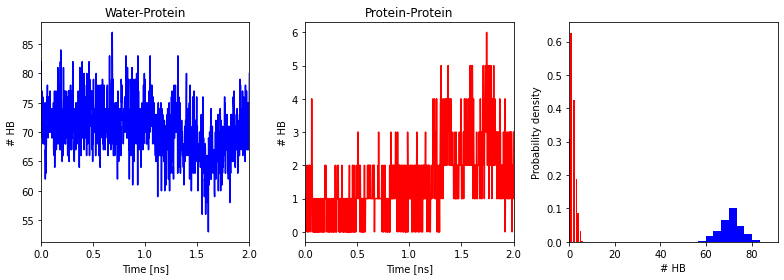

In [27]:
time, hb_protein_water, _ = np.loadtxt('hb_water_protein2.xvg',comments=['@','#'],unpack=True)
_, hb_protein_protein, _ = np.loadtxt('hb_protein_protein2.xvg',comments=['@','#'],unpack=True)
time /= 1000

fig = plt.figure(figsize=(11,4))
ax1 = fig.add_subplot(131,)
ax2 = fig.add_subplot(132,sharex = ax1)
ax3 = fig.add_subplot(133,)
ax1.plot(time,hb_protein_water,c='b')
ax2.plot(time,hb_protein_protein,c='r')
ax3.hist(hb_protein_water,color='b',density=True)
ax3.hist(hb_protein_protein,color='r',density=True)
ax1.set_xlim(time[0],time[-1])
ax1.set_xlabel(r"Time [ns]")
ax2.set_xlabel(r"Time [ns]")
ax3.set_xlabel(r"# HB")
ax1.set_ylabel(r"# HB")
ax2.set_ylabel(r"# HB")
ax3.set_ylabel("Probability density")
ax1.set_title('Water-Protein')
ax2.set_title('Protein-Protein')
m = np.min(np.concatenate((hb_protein_water,hb_protein_protein)))*0.95
M = np.max(np.concatenate((hb_protein_water,hb_protein_protein)))*1.05
ax3.set_xlim(m,M)
fig.tight_layout()


In [ ]:
%%bash
echo "Protein" | gmx do_dssp -s cady_3.pdb -f cady_D1.xtc -tu ns -dt 0.1

In [ ]:
%%bash
echo "; Command line options of xpm2ps override the parameters in this file
xbox                     = 4.0          ; x-size of a matrix element
ybox                     = 8.0          ; x-size of a matrix element
y-major                  = 5            ; y major ticks
y-minor                  = 0
" > options.m2p
gmx xpm2ps -f ss.xpm -di options.m2p -o ss.eps
convert_image(f="ss.eps",o="ss.png")